In [182]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [183]:
def generate_dataset(n_clusters: int, n_points: int = 100, std: float = 1.0, min: float = -10, max: float = 10, random_state : int = None):
    """
    generates a two dimensional set of points
    :param n_clusters: number of clusters to generate
    :param n_points: number of total points to generate for all clusters
    :param std: standard deviation of cluster points
    :param min: minimum point value
    :param max: maximum point value
    :param random_state: random generator seed
    :return: X, array of points shape (n_points, 2)
    :return: y, array of point cluster identity
    :return: centers, center point for each cluster
    """
    X, y, centers = make_blobs(n_samples=n_points, n_features=2, centers=n_clusters, cluster_std=std, center_box=(min, max), return_centers=True, random_state=random_state)
    return X, y, centers

In [202]:
"""
Requirements:
the input plot must without axes
"""
def generate_save_plot(n_clusters, n_points, std, random_state, plot_path, show=True):
    X, y, centers = generate_dataset(
        n_clusters = n_clusters, 
        n_points = n_points,
        std = std,
        random_state = random_state
    )
    plt.scatter(X[:, 0], X[:, 1])
    plt.axis('off') # to save plot without axes
    plt.savefig(plot_path)
    if show: plt.show()
    plt.clf()
        
def get_binary_plot(path):
    plot = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    bp = plot
    bp[plot == 255] = 0;
    bp[plot>0] = 1;
    return bp

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


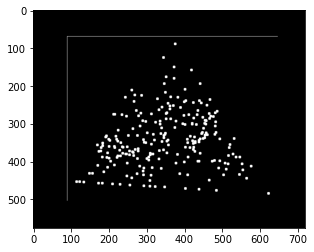

In [373]:
# generate_save_plot(4, 100, 1.0, 42, '../plots/test.png')
binary_plot = get_binary_plot('../plots/predict/unknow_2.png')
print(binary_plot)
plt.imshow(binary_plot, cmap='gray')

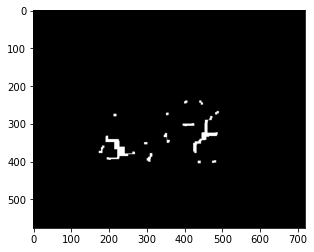

In [374]:
s1=(6,6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, s1)
morph1 = cv2.morphologyEx(binary_plot, cv2.MORPH_OPEN, kernel)

s2 = (20,20)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, s2)
morph2 = cv2.morphologyEx(morph1, cv2.MORPH_CLOSE, kernel)

# kernel = np.ones((n,n), np.uint8)
# img_dilation = cv2.dilate(binary_plot, kernel, iterations=1)
plt.imshow(morph2, cmap='gray')

In [386]:
def cca(image, p=0.3, show=True):
    num_labels, labels = cv2.connectedComponents(np.uint8(image), connectivity=8)

    cc_masks = []
    cc_sizes = []

    for i in range(1, num_labels):
        
        component = (labels == i)
        num_pixels = np.sum(component)
        cc_sizes.append(num_pixels)
        
        cc_masks.append([component, num_pixels])

    cc_masks = np.array(cc_masks, dtype=object)
    sorted_cc_masks = np.argsort(-cc_masks[:,-1])
    

    cc_sizes = np.array(cc_sizes)
    index = sorted_cc_masks[0]
    cc_sizes = cc_sizes[cc_sizes >= cc_sizes[index]*p]
    
    clusters = cc_masks[index][0]
    for i in range(1, len(cc_sizes)):
        index = sorted_cc_masks[i]
        clusters = clusters | cc_masks[index][0]
    
    if show: plt.imshow(clusters)

    return clusters, len(cc_sizes)

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 2)

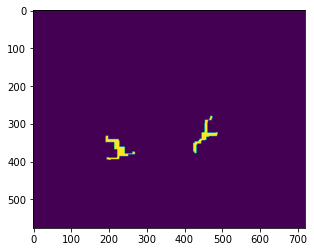

In [387]:
cca(morph2)

In [390]:
def find_n_clusters_cca(plot_path, p=0.2, show=True):
    binary_plot = get_binary_plot(plot_path)
    
    # image opening
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
    morph1 = cv2.morphologyEx(binary_plot, cv2.MORPH_OPEN, kernel1)
    plt.imshow(morph1)

    # image closing
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
    morph2 = cv2.morphologyEx(morph1, cv2.MORPH_CLOSE, kernel2)
    plt.imshow(morph2)
    
    _, n_clusters = cca(morph2, p, show)
    print('Number of clusters:', n_clusters)

Number of clusters: 3


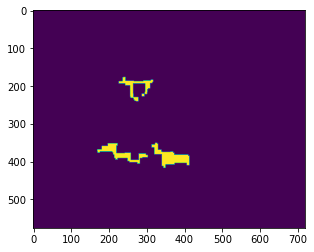

In [404]:
find_n_clusters_cca('../plots/predict/unknow_5.png')